# Data Exploration 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Import Data

In [26]:
df_mtv = pd.read_csv("../../data/mtv_meta.csv")
df_mtv.head()

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,title,also_buy,tech2,brand,rank,also_view,main_cat,similar_item,price,details
0,5.0,True,"04 8, 2018",A1CW3NLH9MBQRY,6303022901,{'Format:': ' DVD'},Sally Nunez,I really enjoyed this movie. Brings tears to m...,Five Stars,1523145600,...,The Joy Luck Club VHS,[],NaN,Tamlyn Tomita,"295,699 in Movies & TV (",[],Movies & TV,NaN,$3.28,{'ASIN: ': '6303022901'}
1,5.0,True,"04 2, 2018",A1WK0IRZ08NX9X,6303022901,{'Format:': ' DVD'},Ammie28,"If you have never seen this movie, you may jus...",Heart Touching...,1522627200,...,The Joy Luck Club VHS,[],NaN,Tamlyn Tomita,"295,699 in Movies & TV (",[],Movies & TV,NaN,$3.28,{'ASIN: ': '6303022901'}
2,5.0,True,"03 30, 2018",A2HGXJQCQTXE4E,6303022901,{'Format:': ' Blu-ray'},Pa nhia lee,awesome all time fave movie.,Five Stars,1522368000,...,The Joy Luck Club VHS,[],NaN,Tamlyn Tomita,"295,699 in Movies & TV (",[],Movies & TV,NaN,$3.28,{'ASIN: ': '6303022901'}
3,5.0,True,"03 30, 2018",A14ASTA78EK120,6303022901,{'Format:': ' DVD'},lalush,The greatest movie ever!!!!!,Five Stars,1522368000,...,The Joy Luck Club VHS,[],NaN,Tamlyn Tomita,"295,699 in Movies & TV (",[],Movies & TV,NaN,$3.28,{'ASIN: ': '6303022901'}
4,5.0,True,"03 29, 2018",A2EGT1RXKVOXTJ,6303022901,{'Format:': ' Amazon Video'},Karin,Love this movie,Five Stars,1522281600,...,The Joy Luck Club VHS,[],NaN,Tamlyn Tomita,"295,699 in Movies & TV (",[],Movies & TV,NaN,$3.28,{'ASIN: ': '6303022901'}


In [27]:
df_mtv.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'category', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand',
       'rank', 'also_view', 'main_cat', 'similar_item', 'price', 'details'],
      dtype='object')

In [28]:
df_mtv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742460 entries, 0 to 2742459
Data columns (total 24 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   style           object 
 6   reviewerName    object 
 7   reviewText      object 
 8   summary         object 
 9   unixReviewTime  int64  
 10  vote            object 
 11  category        object 
 12  description     object 
 13  fit             float64
 14  title           object 
 15  also_buy        object 
 16  tech2           float64
 17  brand           object 
 18  rank            object 
 19  also_view       object 
 20  main_cat        object 
 21  similar_item    float64
 22  price           object 
 23  details         object 
dtypes: bool(1), float64(4), int64(1), object(18)
memory usage: 483.9+ MB


In [29]:
df_mtv.overall

0          5.0
1          5.0
2          5.0
3          5.0
4          5.0
          ... 
2742455    1.0
2742456    5.0
2742457    5.0
2742458    1.0
2742459    3.0
Name: overall, Length: 2742460, dtype: float64

In [30]:
df_mtv.asin

0          6303022901
1          6303022901
2          6303022901
3          6303022901
4          6303022901
              ...    
2742455    B01HJ3E0PQ
2742456    B01HJ6R77G
2742457    B01HJ6R77G
2742458    B01HJCCLOY
2742459    B01HJCCLOY
Name: asin, Length: 2742460, dtype: object

In [31]:
df_mtv = df_mtv.drop(['verified', 'rank', 'also_buy', 'also_view', 'details'], axis=1)

df_mtv = df_mtv.rename(columns={'overall':'rating', 'asin':'productID'})

In [32]:
df_mtv.shape

(2742460, 19)

In [33]:
df_mtv.head()

,rating,reviewTime,reviewerID,productID,style,reviewerName,reviewText,summary,unixReviewTime,vote,category,description,fit,title,tech2,brand,main_cat,similar_item,price
0,5.0,"04 8, 2018",A1CW3NLH9MBQRY,6303022901,{'Format:': ' DVD'},Sally Nunez,I really enjoyed this movie. Brings tears to m...,Five Stars,1523145600,NaN,"['Movies & TV', 'Genre for Featured Categories...",['Produced by Academy Award(R)-winning filmmak...,NaN,The Joy Luck Club VHS,NaN,Tamlyn Tomita,Movies & TV,NaN,$3.28
1,5.0,"04 2, 2018",A1WK0IRZ08NX9X,6303022901,{'Format:': ' DVD'},Ammie28,"If you have never seen this movie, you may jus...",Heart Touching...,1522627200,NaN,"['Movies & TV', 'Genre for Featured Categories...",['Produced by Academy Award(R)-winning filmmak...,NaN,The Joy Luck Club VHS,NaN,Tamlyn Tomita,Movies & TV,NaN,$3.28
2,5.0,"03 30, 2018",A2HGXJQCQTXE4E,6303022901,{'Format:': ' Blu-ray'},Pa nhia lee,awesome all time fave movie.,Five Stars,1522368000,NaN,"['Movies & TV', 'Genre for Featured Categories...",['Produced by Academy Award(R)-winning filmmak...,NaN,The Joy Luck Club VHS,NaN,Tamlyn Tomita,Movies & TV,NaN,$3.28
3,5.0,"03 30, 2018",A14ASTA78EK120,6303022901,{'Format:': ' DVD'},lalush,The greatest movie ever!!!!!,Five Stars,1522368000,NaN,"['Movies & TV', 'Genre for Featured Categories...",['Produced by Academy Award(R)-winning filmmak...,NaN,The Joy Luck Club VHS,NaN,Tamlyn Tomita,Movies & TV,NaN,$3.28
4,5.0,"03 29, 2018",A2EGT1RXKVOXTJ,6303022901,{'Format:': ' Amazon Video'},Karin,Love this movie,Five Stars,1522281600,NaN,"['Movies & TV', 'Genre for Featured Categories...",['Produced by Academy Award(R)-winning filmmak...,NaN,The Joy Luck Club VHS,NaN,Tamlyn Tomita,Movies & TV,NaN,$3.28


Text(0, 0.5, 'Count')

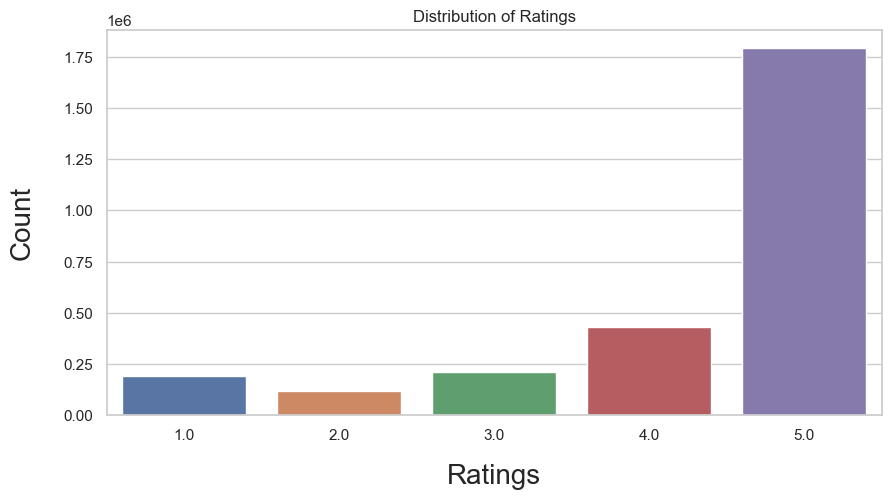

In [39]:
import seaborn as sns

sns.set(context = 'notebook', style = 'whitegrid', font_scale=1)
plt.figure(figsize = (10, 5))
ax = sns.countplot(x="rating", data=df_mtv, alpha=1)

plt.title("Distribution of Ratings")
plt.xlabel("Ratings", fontsize = 20, labelpad=15)
plt.ylabel("Count", fontsize = 20,labelpad=20)

In [98]:
df_mtv.rating.value_counts(normalize=True)

5.0    0.653946
4.0    0.156632
3.0    0.077169
1.0    0.070105
2.0    0.042147
Name: rating, dtype: float64

In [78]:
# Reviewer's rating counts
reviewer_count = df_mtv.groupby('reviewerID')['rating'].count()

# Productwise rating counts
product_count = df_mtv.groupby('title')['rating'].count()

# 
reviewer_count.sort_values(ascending = False)

reviewerID
A1L2DLWYRNHKDR          487
A1NSDP9YZXLMDX          455
A2YUA3H1LLU53Z          419
A3DZT870KCFD1           377
A1BT9J2I6DC246          327
                       ... 
A38AP2M7YHO0BF            1
A38AOWGK4NV9H8            1
A38AORJDS6WWVV            1
A38AOLYO6WH0FM            1
A00013803RVZPCZKTT9U      1
Name: rating, Length: 1400661, dtype: int64

In [76]:
top_reviewers = reviewer_count.sort_values(ascending=False)[:20]
count_reviewers = len(reviewer_count)
print("Total number of reviewers in 2016-2018: ", count_reviewers)
print('Top 20 reviewers: ',top_reviewers)

Total number of reviewers in 2016-2018:  1400661
Top 20 reviewers:  reviewerID
A1L2DLWYRNHKDR    487
A1NSDP9YZXLMDX    455
A2YUA3H1LLU53Z    419
A3DZT870KCFD1     377
A1BT9J2I6DC246    327
AJ2LH4FFW4QYX     300
A3EMYILKQKEON7    273
AE48173ASWFYI     259
A30M9ME5AT8K12    237
A3I4C4LS3ID7Y4    235
A1TA5QYECZP1L1    224
A3LDO43KPFU9I4    215
A2K4PH68WESPT4    192
A3F8RN37P4WLNH    188
AIMR915K4YCN      185
A20J989QAU0H67    185
A2TV03ELEWRXAL    184
A16P7VIXBJC56H    182
A1Y09QLADQYQJG    180
A2NP5ONODHBGDU    176
Name: rating, dtype: int64


### Top 20 productw (Movies & TV)

In [80]:
top_products = product_count.sort_values(ascending=False)[:20]
count_products = len(reviewer_count)
print("Total number of products reviewed in 2016-2018: ", count_products)
print('Top 20 products reviews: ',top_products)

Total number of products reviewed in 2016-2018:  1400661
Top 20 products reviews:  title
Band Of Brothers (DVD)                                             21454
Doctor Thorne - Season 1 2015                                      20558
The Martian                                                        14101
Bone Tomahawk                                                      12864
The Wire: Season 1                                                 11142
Downton Abbey                                                      10879
Band of Brothers(Elite SC/BD+DCExp12-21)                           10828
Ex Machina 2015                                                     8858
Remember                                                            7960
24: Season 1                                                        7684
The Big Lebowski VHS                                                7636
The Boondock Saints                                                 7632
The Hunger Games: Mockingjay Part 1

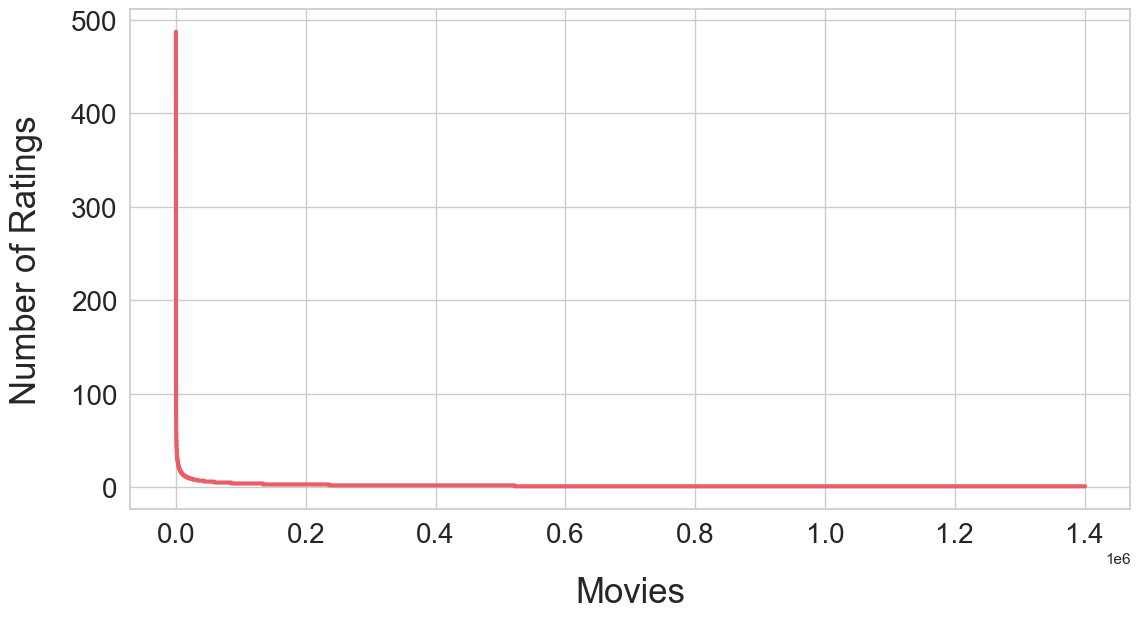

In [81]:
fig = plt.figure(figsize = (10, 5))
axes = fig.add_axes([0.1,0.1,1,1])
# plt.title("Number of Ratings Per Movie", fontsize = 20)
plt.xlabel("Movies", fontsize = 25, labelpad=20)
plt.ylabel("Number of Ratings", fontsize = 25, labelpad=20)
plt.plot(reviewer_count.sort_values(ascending = False).values, color='#eb5e68', linewidth=3)
plt.tick_params(labelsize = 20)


### Top 20 Reviewers

<AxesSubplot:title={'center':'Top Reviewers'}, xlabel='Counts', ylabel='reviewerID'>

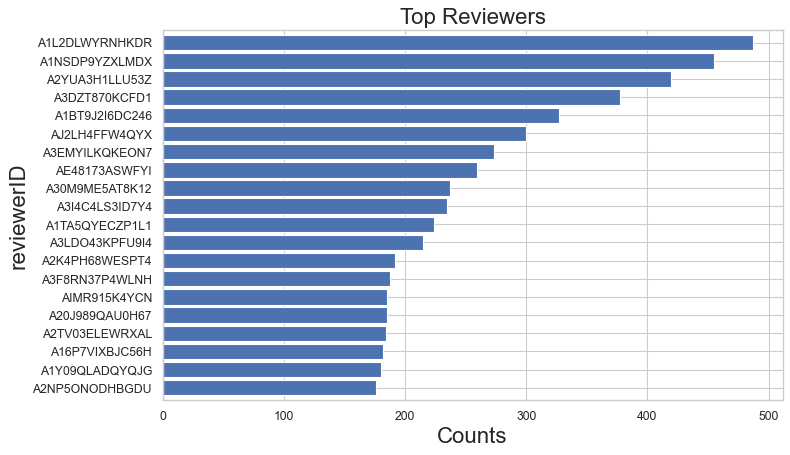

In [95]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Counts", fontsize = 20)
plt.ylabel("Reviewers", fontsize = 20)
plt.title('Top Reviewers', fontsize = 20)
top_reviewers.sort_values().plot(kind='barh', zorder=2, width=0.85)


<AxesSubplot:title={'center':'Top 20 Movies'}, xlabel='Counts', ylabel='title'>

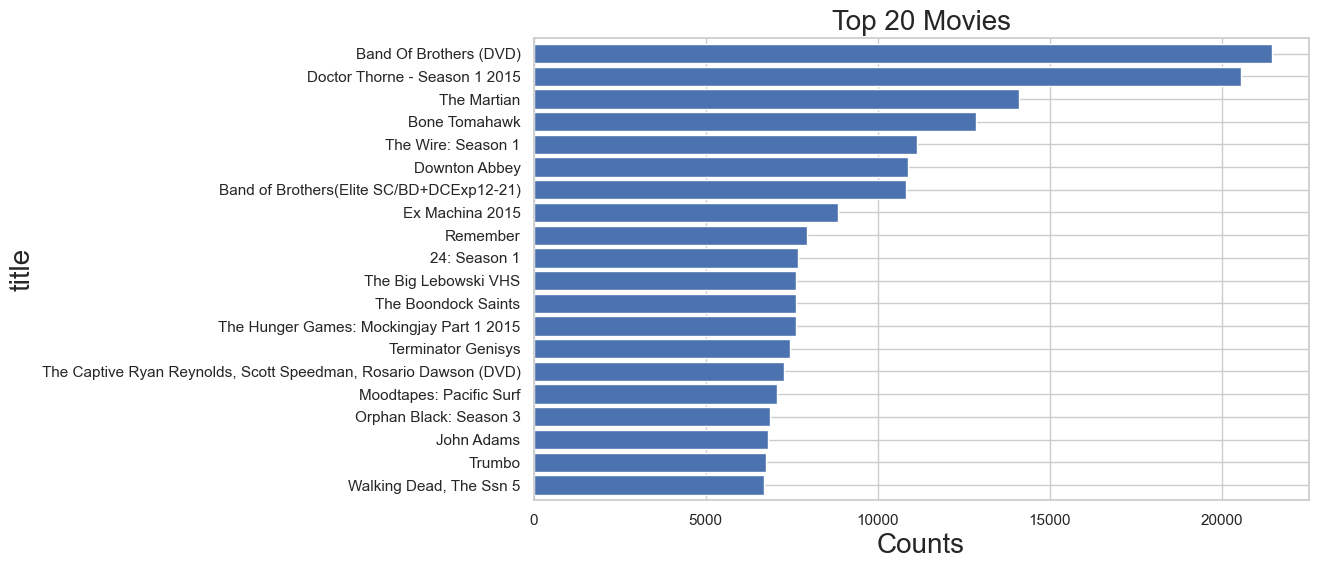

In [97]:
figure(num=None, figsize=(10, 6))
plt.xlabel("Counts", fontsize = 20)
plt.ylabel("Movie", fontsize = 20)
plt.title('Top 20 Movies', fontsize = 20)
top_products.sort_values().plot(kind='barh', zorder=2,  width=0.85)

In [100]:
top_products[1]

20558

## Summary findings

'''
a) Between year 206-2018, the majority of movies and tv shows have gotten 5 start ratings (65%)
'''